### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import collections
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)

In [2]:
os.chdir('E:\Data\Customer Churn')

### Import The Dataset

In [3]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### EDA

In [5]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

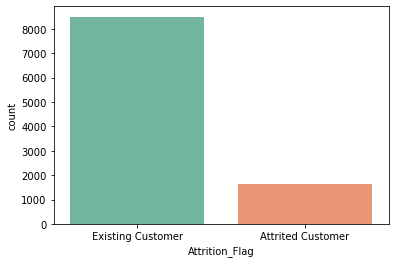

In [7]:
sns.countplot('Attrition_Flag', data = df, palette="Set2")

### From above graph we can conclude that the dataset is very imbalanced. So we apply Upsampling technique in future steps

([<matplotlib.patches.Wedge at 0x176e59f0370>,
 [Text(-1.8381436394143411, 1.0154939492092507, 'Existing Customer'),
  Text(0.9628371693563555, -0.5319253568930898, 'Attrited Customer')])

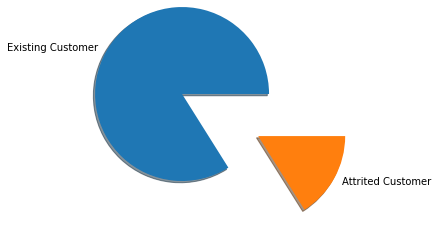

In [114]:
plt.pie(x = df['Attrition_Flag'].value_counts(), explode = (1, 0), shadow = True, labels = df['Attrition_Flag'].unique())

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

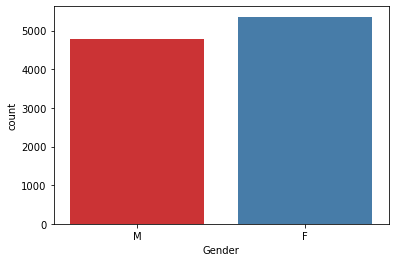

In [9]:
sns.countplot('Gender', data = df, palette="Set1")

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependent_count', ylabel='count'>

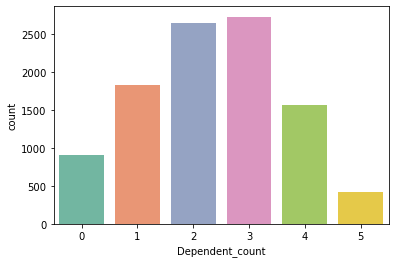

In [10]:
sns.countplot('Dependent_count', data = df, palette="Set2")

([<matplotlib.patches.Wedge at 0x176d99ff1f0>,
 [Text(1.3898736219989494, 1.5742462688129586, '3'),
  Text(-0.8933957390624471, 0.64175077204867, '5'),
  Text(-0.789015784958494, -0.7664555375795336, '4'),
  Text(0.2812659447660177, -1.0634328696795485, '2'),
  Text(0.941491740843086, -0.568852618807592, '0'),
  Text(1.0904981807741219, -0.14426960084623058, '1')])

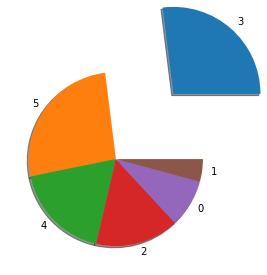

In [11]:
plt.pie(x = df['Dependent_count'].value_counts(), shadow = True, explode = (1, 0, 0, 0, 0, 0), labels = df['Dependent_count'].unique())

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'High School'),
  Text(1, 0, 'Graduate'),
  Text(2, 0, 'Uneducated'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'College'),
  Text(5, 0, 'Post-Graduate'),
  Text(6, 0, 'Doctorate')])

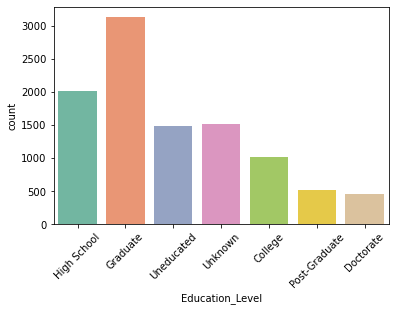

In [12]:
sns.countplot('Education_Level', data = df, palette="Set2")
plt.xticks(rotation=45)

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

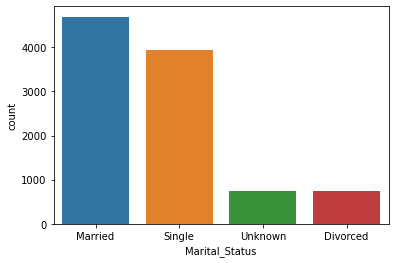

In [13]:
sns.countplot('Marital_Status', data = df, palette="tab10")

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '$60K - $80K'),
  Text(1, 0, 'Less than $40K'),
  Text(2, 0, '$80K - $120K'),
  Text(3, 0, '$40K - $60K'),
  Text(4, 0, '$120K +'),
  Text(5, 0, 'Unknown')])

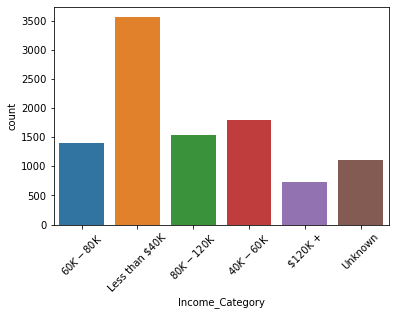

In [14]:
sns.countplot('Income_Category', data = df, palette="tab10")
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

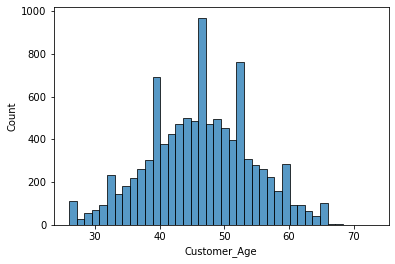

In [116]:
sns.histplot(x = 'Customer_Age', data = df, bins = 40)

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_Age'>

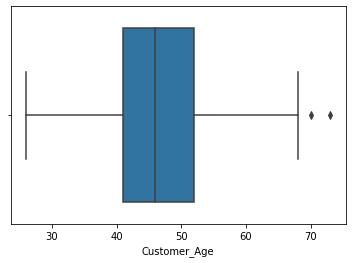

In [118]:
sns.boxplot(df['Customer_Age'])

### We can ignore the outliers of Customer_Age column as these outliers may be the ages of Senior Citizens.

<AxesSubplot:xlabel='Months_on_book', ylabel='Count'>

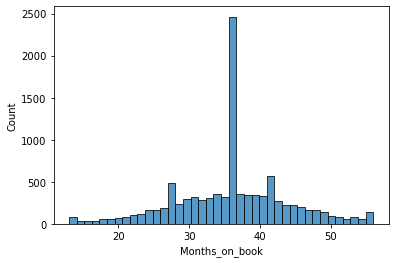

In [16]:
sns.histplot(x = 'Months_on_book', data = df, bins = 40)

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Months_on_book'>

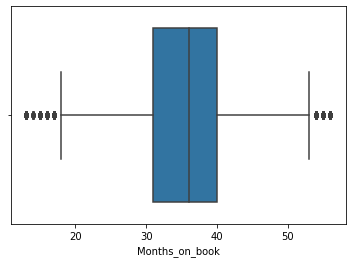

In [119]:
sns.boxplot(df['Months_on_book'])

### We can ignore the outliers of Months_on_book column as these outliers may be the entries of the person who have taken loan a long time ago and their repayment is still in progress.

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Count'>

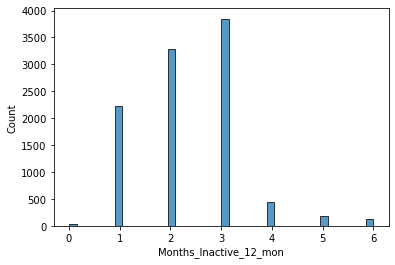

In [17]:
sns.histplot(x = 'Months_Inactive_12_mon', data = df, bins = 40)

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Months_Inactive_12_mon'>

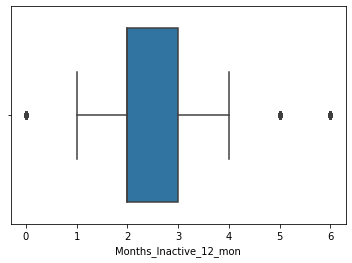

In [120]:
sns.boxplot(df['Months_Inactive_12_mon'])

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Card_Category', ylabel='count'>

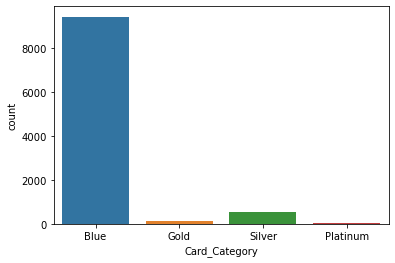

In [18]:
sns.countplot('Card_Category', data = df, palette="tab10")
#plt.xticks(rotation = 45)

<AxesSubplot:>

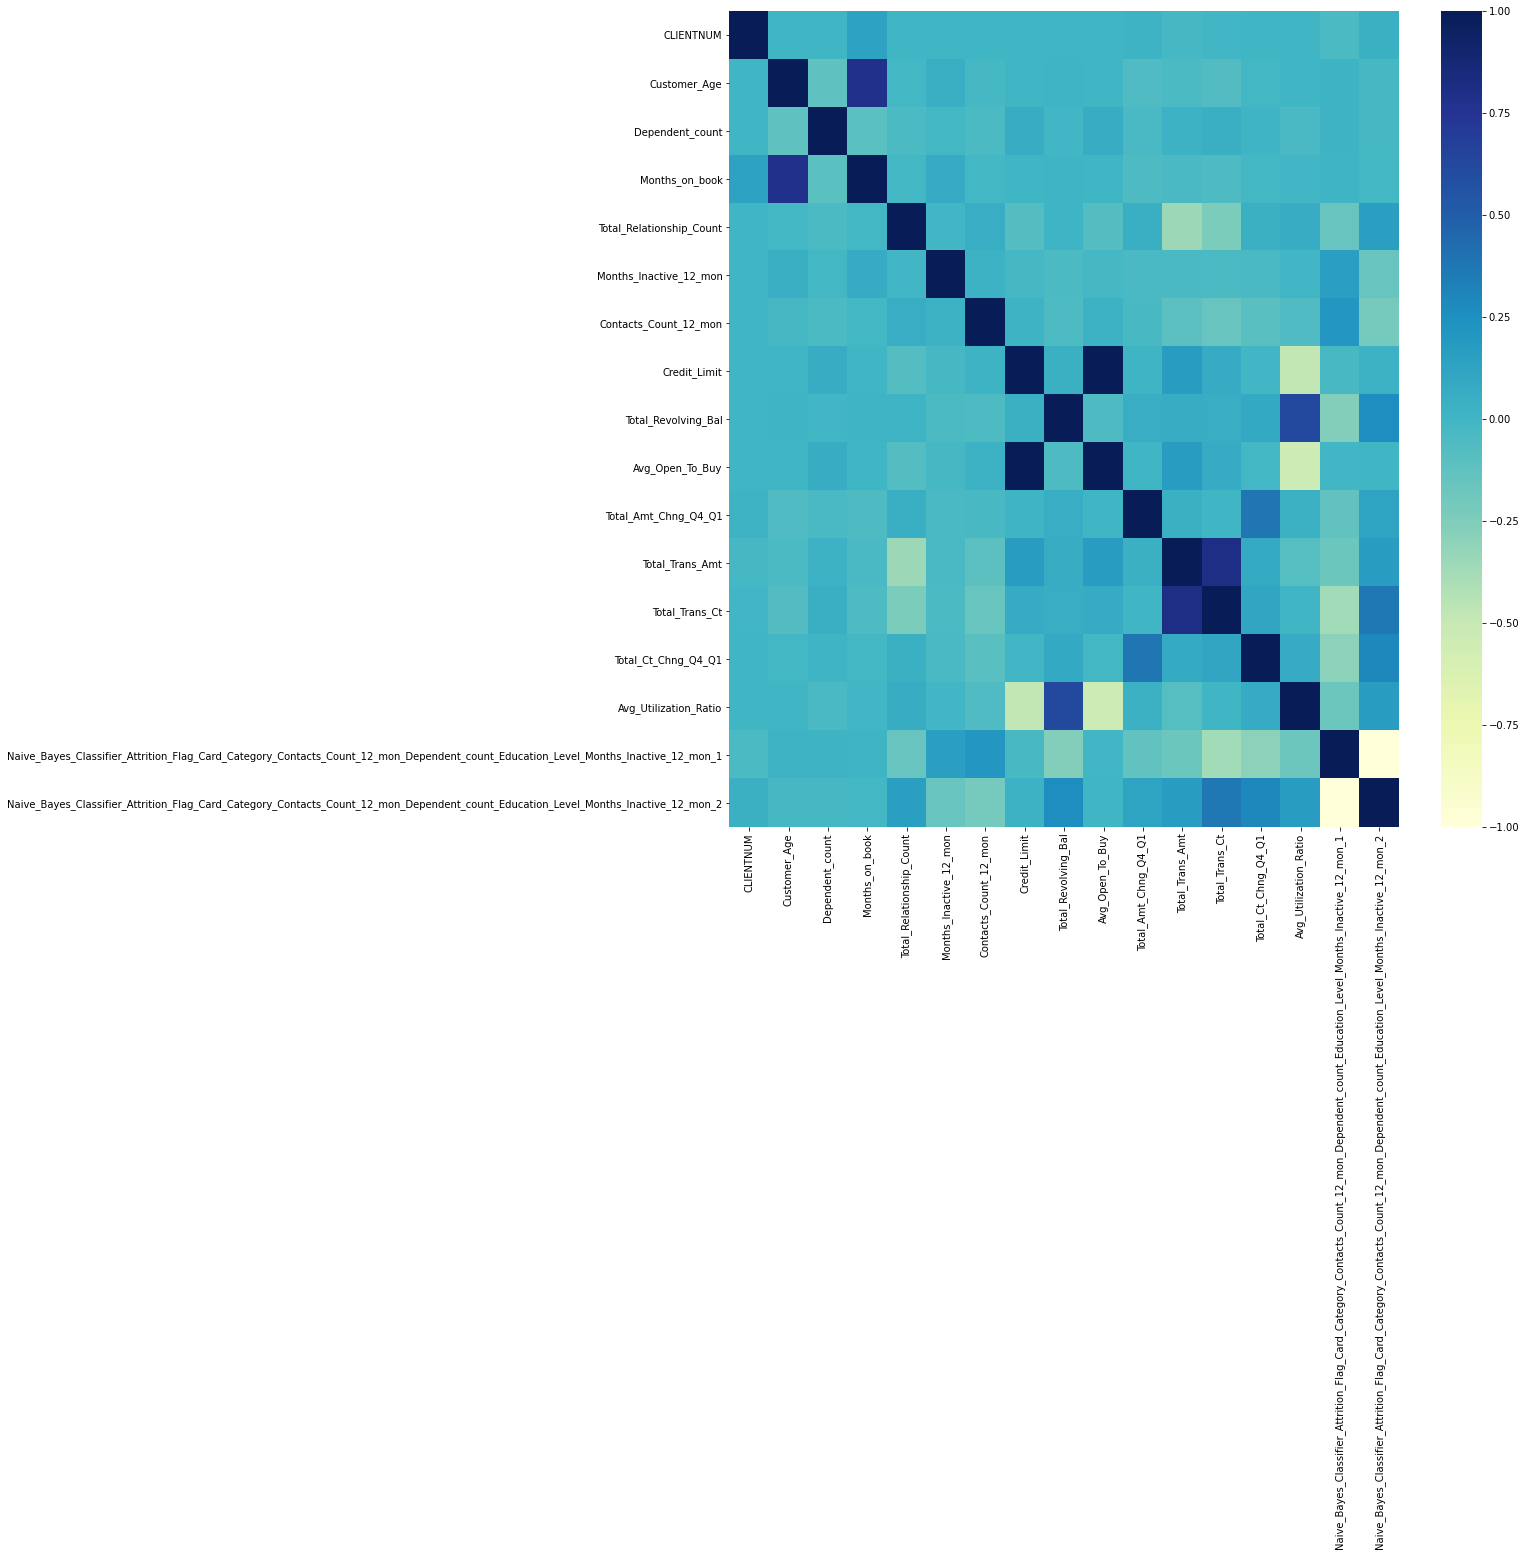

In [19]:
corr = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr, cmap="YlGnBu")

### Handling Categorical Data

In [20]:
gender = pd.get_dummies(df['Gender'], drop_first = True)

In [21]:
edu_lev = pd.get_dummies(df['Education_Level'], drop_first = True)

In [22]:
mar_status = pd.get_dummies(df['Marital_Status'], drop_first = True)

In [23]:
income_cat = pd.get_dummies(df['Income_Category'], drop_first = True)

In [24]:
card_cat = pd.get_dummies(df['Card_Category'], drop_first = True)

In [25]:
df = df.merge(gender, right_index= True, left_index= True)

In [26]:
df = df.merge(edu_lev, right_index= True, left_index= True)

In [27]:
df = df.merge(mar_status, right_index= True, left_index= True)

In [28]:
df = df.merge(income_cat, right_index = True, left_index = True)

In [29]:
df = df.merge(card_cat, right_index = True, left_index= True)

In [30]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,M,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown_x,Married,Single,Unknown_y,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,Gold,Platinum,Silver
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [31]:
df.drop(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'CLIENTNUM'], axis = 1, inplace = True)

In [32]:
X = df.drop(['Attrition_Flag'], axis = 1)
y = df['Attrition_Flag']

### Up Sampling to prepare data for training

In [34]:
smt = SMOTE()
print('Before', collections.Counter(y))
X_sm, y_sm = smt.fit_resample(X, y)
print("After", collections.Counter(y_sm))

Before Counter({'Existing Customer': 8500, 'Attrited Customer': 1627})
After Counter({'Existing Customer': 8500, 'Attrited Customer': 8500})


In [41]:
y_sm = pd.get_dummies(y_sm, drop_first = True)

In [43]:
y_sm.value_counts()

Existing Customer
1                    8500
0                    8500
dtype: int64

In [45]:
scaler = MinMaxScaler(feature_range= (0, 1))

### Reducing the number of features using PCA

In [50]:
cols = X_sm.columns
pca = PCA(n_components= 4)
pca_result = pca.fit_transform(X_sm[cols].values)

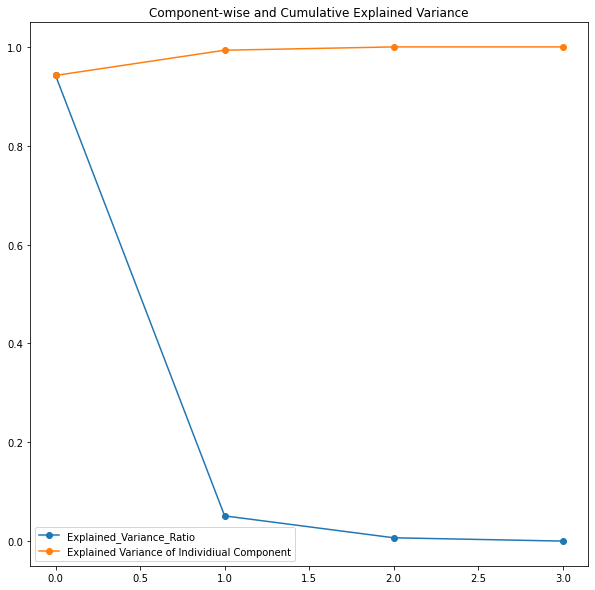

In [111]:
plt.figure(figsize = (10, 10))
plt.plot(range(4), pca.explained_variance_ratio_, 'o-', label = 'Explained_Variance_Ratio')
plt.plot(range(4),  np.cumsum(pca.explained_variance_ratio_), 'o-', label = 'Explained Variance of Individiual Component')
plt.title("Component-wise and Cumulative Explained Variance")
plt.legend()

### Training the Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [55]:
pca_scaled = scaler.fit_transform(pca_result)

In [59]:
pca_scaled.shape

(17000, 4)

In [61]:
y_sm.shape

(17000, 1)

In [62]:
pca_scaled_train, pca_scaled_test, y_sm_train, y_sm_test = train_test_split(pca_scaled, y_sm, test_size = 0.2, random_state = 0)

In [57]:
clf = RandomForestClassifier()

In [63]:
clf.fit(pca_scaled_train, y_sm_train)

<ipython-input-63-3c52b072fc2b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(pca_scaled_train, y_sm_train)


RandomForestClassifier()

In [64]:
y_pred = clf.predict(pca_scaled_test)

In [68]:
score = accuracy_score(y_sm_test, y_pred)

In [155]:
print('Un Optimized Accuracy is:', score)

Un Optimized Accuracy is: 0.9338235294117647


### Model Optimization

In [89]:
rand_params = {'n_estimators' : [50, 100, 150, 200],
                'criterion' : ['gini', 'entropy'],
                'bootstrap' : [True, False]}
                #''''ccp_alpha' : [0, 0.2, 0.3, 0.5]'''
              #}

In [91]:
clf_optimized = RandomForestClassifier()

In [145]:
gs_rand = GridSearchCV(clf_optimized, param_grid = rand_params, cv= 5, n_jobs = -1, scoring='f1')

In [146]:
gs_rand.fit(pca_scaled_train, y_sm_train)

C:\Users\chhav\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [147]:
y_pred_cv = clf.predict(pca_scaled_test)

In [148]:
score_cv = accuracy_score(y_sm_test, y_pred_cv)

In [154]:
print('Optimized Accuracy is:', score_cv)

Optimized Accuracy is: 0.9338235294117647


In [150]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Optimized Model Confusion Matrix')

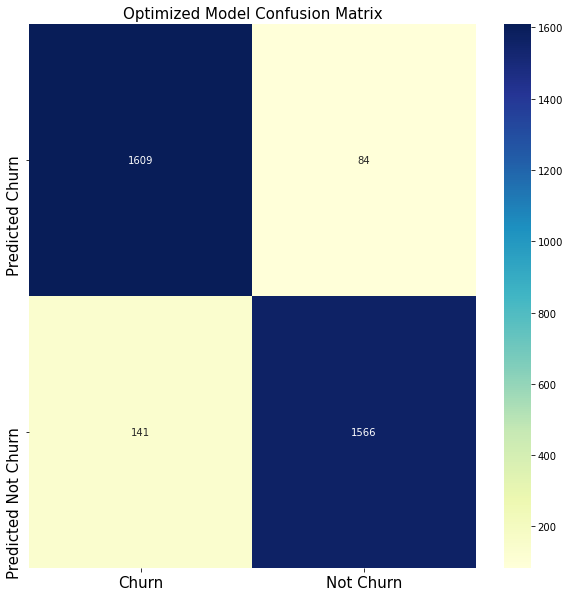

In [157]:
plt.figure(figsize = (10, 10))
ax = sns.heatmap(confusion_matrix(y_sm_test, y_pred_cv), cmap = 'YlGnBu', annot = True, fmt='d')
ax.set_xticklabels(['Churn', 'Not Churn'], fontsize = 15)
ax.set_yticklabels(['Predicted Churn', 'Predicted Not Churn'], fontsize = 15)
ax.set_title('Optimized Model Confusion Matrix', fontsize = 15)

Text(0.5, 1.0, 'Un Optimized Model Confusion Matrix')

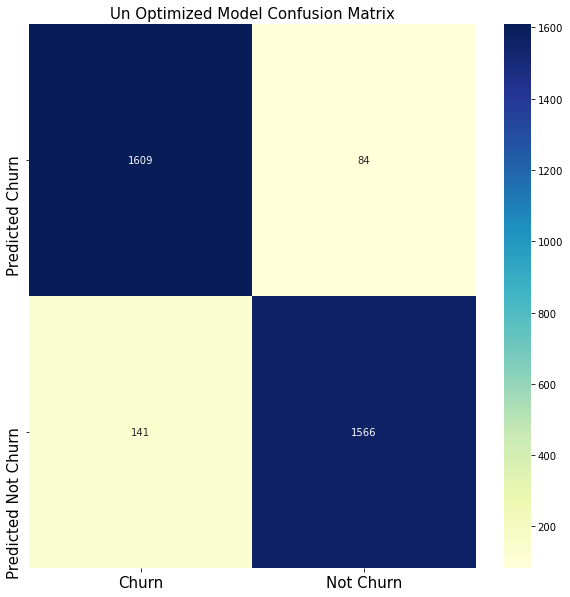

In [158]:
plt.figure(figsize = (10, 10))
ax = sns.heatmap(confusion_matrix(y_sm_test, y_pred), cmap = 'YlGnBu', annot = True, fmt='d')
ax.set_xticklabels(['Churn', 'Not Churn'], fontsize = 15)
ax.set_yticklabels(['Predicted Churn', 'Predicted Not Churn'], fontsize = 15)
ax.set_title('Un Optimized Model Confusion Matrix', fontsize = 15)

### We can colclude that performing Optimization doesn't affect the output of the model as concluded from confusion matrix and accuracy of both optimized and un optimized model.